## Restb.ai

In [1]:
#Importacions
import requests
import pandas as pd
import re, json, os

Creació del dataset

In [2]:
#with open('D:\Escritorio\Hack_UPC_2023\hackupc2023_restbai__dataset\hackupc2023_restbai__dataset_sample.json', encoding="utf8") as json_file:
with open('hackupc2023_restbai__dataset.json', encoding="utf8") as json_file:
    data = json.load(json_file)

dataset = [data[i] for i in data]
df = pd.DataFrame(dataset)

image_data = [i for i in df['image_data']]
image = pd.DataFrame(image_data)

a = []
for variable in image.columns:
    a.append([i for i in image[variable]])

r1r6 = pd.DataFrame(a[0])
style = pd.DataFrame(a[1])
features_by_room_type = pd.DataFrame(a[2])

In [3]:
for i in features_by_room_type.columns:
    features_by_room_type[i][features_by_room_type[i].isna()] = 0
    features_by_room_type[i][features_by_room_type[i] != 0] = 1

In [4]:
df[['property_quality', 'kitchen_quality', 'bathroom_quality', 'interior_quality']] = r1r6
df[['style_label', 'style_confidence']] = style
df[['outdoor_house', 'living-dining_room', 'kitchen', 'details', 'stairs',
       'empty_room', 'bathroom', 'room-bedroom', 'dining_room',
       'storage_pantry', 'parking', 'laundry_room', 'balcony', 'gym', 'garden',
       'living_room', 'hall-corridor', 'office', 'mountain_view',
       'outdoor_building', 'terrace', 'documents', 'energy_certificate',
       '2D_floor_plan', 'reception-lobby', 'water_view', 'non_related', 'pool',
       'walk_in_closet', 'map_location', 'cellar', '3D_floor_plan']] = features_by_room_type
df = df.drop(columns='image_data')

#df[['property_quality', 'kitchen_quality', 'bathroom_quality', 'interior_quality']] = r1r6
#df[['style_label', 'style_confidence']] = style
#df[['terrace', 'outdoor_building', 'room-bedroom', 'empty_room',
#       'outdoor_house', 'kitchen', 'bathroom', 'hall-corridor', 'living_room',
#       'balcony', 'dining_room', 'stairs', 'non_related', 'pool',
#       '2D_floor_plan', 'energy_certificate', 'details', 'living-dining_room',
#       'garden', 'map_location', 'reception-lobby', 'office', 'mountain_view',
#       'storage_pantry', 'cellar', 'gym', 'parking', 'documents',
#       'laundry_room', 'water_view']] = features_by_room_type
#
#df = df.drop(columns='image_data')
#df

In [5]:
df['summary'] = df['summary'].apply(lambda x: x.split()[0])


In [6]:
import nltk
categorical=[]
for data in df['summary']:
    a = nltk.word_tokenize(data)
    categorical.append(a[0])
categorical

['Casa',
 'Piso',
 'Casa',
 'Casa',
 'Casa',
 'Apartamento',
 'Casa',
 'Piso',
 'Piso',
 'Chalet',
 'Casa',
 'Dúplex',
 'Piso',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Apartamento',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Piso',
 'Apartamento',
 'Piso',
 'Chalet',
 'Casa',
 'Piso',
 'Dúplex',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Chalet',
 'Piso',
 'Casa',
 'Piso',
 'Casa',
 'Piso',
 'Casa',
 'Chalet',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Piso',
 'Ático',
 'Apartamento',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Chalet',
 'Piso',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Piso',
 'Casa',
 'Chalet',
 'Piso',
 'Ático',
 'Casa',
 'Apartamento',
 'Piso',
 'Ático',
 'Piso',
 'Piso',
 'Piso',
 'Piso',
 'Casa',
 'Casa',
 'Piso',
 'Chalet',
 'Casa',
 'Piso',
 'Piso',
 'Casa',
 'Piso',
 'Casa',

In [7]:
cat = pd.DataFrame(categorical,columns=['summary'])
df['summary']=cat

In [8]:
a = pd.get_dummies(df['summary'])
noves=list(a.columns)
df[noves]=a

In [9]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
numeric_df = df[numeric_cols]
#numeric_df[numeric_df['property_quality'].isna()]
#numeric_df[numeric_df['kitchen_quality'].isna()]
#numeric_df[numeric_df['bathroom_quality'].isna()]
#numeric_df[numeric_df['interior_quality'].isna()]
#numeric_df[numeric_df['style_confidence'].isna()]

numeric_df=numeric_df[numeric_df.columns[0:5]]

In [10]:
nums=list(numeric_df.columns)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[nums] = scaler.fit_transform(df[nums])
numeric_df=df[nums]

In [12]:
df_concatenado = pd.concat([numeric_df, df.iloc[:, -38:]], axis=1, join='inner', ignore_index=True)
df_concatenado = df_concatenado.apply(pd.to_numeric)

In [13]:
numeric_df

,price,square_meters,bedrooms,bathrooms,num_images
0,0.021955,-0.005384,0.285217,0.535626,1.759901
1,-0.389209,-0.013736,-0.436461,-0.458626,0.122954
2,-0.491999,-0.013048,-0.436461,-0.458626,-0.695519
3,0.302060,-0.007824,0.285217,0.535626,2.332832
4,0.201839,-0.008443,0.285217,0.535626,0.941427
...,...,...,...,...,...
668671,0.710910,0.164095,NaN,NaN,-0.695519
668672,NaN,0.134365,NaN,NaN,0.041107
668673,NaN,0.123435,NaN,NaN,-0.449977
668674,2.848701,-0.004181,0.646056,0.038500,-0.695519


In [14]:

corr = df_concatenado.corr()
corr.style.background_gradient(cmap='RdYlBu').set_precision(4)

C:\Users\rutht\AppData\Local\Temp\ipykernel_17116\2287003111.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='RdYlBu').set_precision(4)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.0000,0.0381,0.1848,0.2962,0.0998,0.0252,0.0470,-0.1016,-0.0205,0.0286,0.1005,0.0109,0.0095,-0.0108,0.0450,0.0996,0.1413,0.0752,-0.0220,0.0809,0.0619,-0.1094,0.1087,0.0788,-0.0115,0.0163,0.0627,0.0910,0.0325,0.2201,0.0659,0.0236,0.0857,0.0111,-0.0505,0.1339,0.1701,-0.0041,-0.0238,0.0699,-0.0024,-0.2130,0.0315
1,0.0381,1.0000,0.0310,0.0169,-0.0023,-0.0037,-0.0030,-0.0061,-0.0088,-0.0077,-0.0043,-0.0014,-0.0023,-0.0028,-0.0047,0.0003,0.0095,-0.0064,-0.0060,-0.0023,0.0420,-0.0066,-0.0044,-0.0011,-0.0011,0.0117,-0.0029,0.0056,0.0074,-0.0027,-0.0009,0.0286,-0.0003,-0.0009,-0.0042,-0.0046,-0.0022,-0.0023,-0.0009,0.0730,-0.0005,-0.0123,-0.0021
2,0.1848,0.0310,1.0000,0.3893,0.0457,0.0123,0.0534,-0.0363,-0.0212,0.0010,0.0519,0.0320,0.0094,-0.0007,0.0032,0.0262,0.0759,0.0171,0.0046,0.0431,0.0247,-0.0349,0.0404,-0.0022,-0.0066,-0.0068,0.0081,-0.0079,0.0103,0.0352,0.0144,0.0074,0.0425,-0.0046,-0.0998,0.1518,0.1055,-0.0096,0.0113,0.0432,-0.0206,-0.1329,-0.0267
3,0.2962,0.0169,0.3893,1.0000,0.0681,0.0131,0.0691,-0.0491,-0.0138,0.0109,0.0530,0.0158,0.0268,-0.0079,0.0186,0.0482,0.0911,0.0255,-0.0119,0.0489,0.0322,-0.0506,0.0744,0.0305,-0.0082,0.0074,0.0225,0.0192,0.0159,0.1234,0.0355,0.0097,0.0518,0.0041,-0.0703,0.1475,0.1585,0.0242,-0.0182,0.0327,-0.0123,-0.1915,-0.0072
4,0.0998,-0.0023,0.0457,0.0681,1.0000,0.4861,0.4526,0.2787,0.7319,0.6827,0.5082,0.3363,0.3604,0.3279,0.4831,0.1958,0.3994,0.4768,0.5818,0.3653,0.1789,0.3263,0.4458,0.0658,0.0732,0.1456,0.3675,0.1701,0.1154,0.2429,0.1877,0.1003,0.1893,0.0656,0.0922,0.0655,0.0533,0.0005,-0.0161,0.0086,-0.0168,-0.1409,0.0013
5,0.0252,-0.0037,0.0123,0.0131,0.4861,1.0000,0.2540,0.1457,0.3903,0.3727,0.2798,0.2091,0.1699,0.1815,0.2204,0.0915,0.1783,0.2591,0.3193,0.1855,0.0855,0.1506,0.1695,0.0227,0.0343,0.0654,0.1692,0.0613,0.0585,0.0634,0.0966,0.0467,0.1139,0.0358,0.0774,0.0420,-0.0027,0.0005,0.0029,0.0073,-0.0069,-0.0794,-0.0052
6,0.0470,-0.0030,0.0534,0.0691,0.4526,0.2540,1.0000,0.1883,0.3285,0.2815,0.2271,0.1909,0.2044,0.1202,0.2067,0.0986,0.2018,0.1865,0.2698,0.1710,0.0750,0.1630,0.2672,0.0027,0.0267,0.0388,0.1645,0.0357,0.0305,0.0724,0.1003,0.0257,0.1189,0.0029,-0.0488,0.1696,0.0659,0.0773,-0.0156,-0.0038,-0.0025,-0.1762,-0.0156
7,-0.1016,-0.0061,-0.0363,-0.0491,0.2787,0.1457,0.1883,1.0000,0.3988,0.1028,-0.0845,0.0376,0.1694,0.0444,0.1396,-0.0078,-0.0007,-0.1334,0.2375,-0.0423,0.0070,0.2815,0.0777,-0.0248,0.0809,0.0399,0.1682,-0.0244,-0.0058,-0.0668,0.0133,-0.0022,0.0071,-0.0087,-0.0124,-0.0732,-0.0475,-0.0046,-0.0154,-0.0563,-0.0085,0.1313,-0.0351
8,-0.0205,-0.0088,-0.0212,-0.0138,0.7319,0.3903,0.3285,0.3988,1.0000,0.7238,0.4010,0.2344,0.2851,0.2783,0.4104,0.1104,0.2171,0.4154,0.5491,0.2584,0.0822,0.3373,0.3312,0.0222,0.0803,0.1049,0.2810,0.1039,0.0550,0.1404,0.1188,0.0414,0.0862,0.0485,0.1423,-0.0299,-0.0221,-0.0039,-0.0028,-0.0435,-0.0169,-0.0236,-0.0101
9,0.0286,-0.0077,0.0010,0.0109,0.6827,0.3727,0.2815,0.1028,0.7238,1.0000,0.4916,0.2511,0.2406,0.2925,0.3773,0.1304,0.2452,0.5269,0.4868,0.3006,0.0940,0.2034,0.3224,0.0429,0.0576,0.0844,0.2312,0.1300,0.0702,0.1789,0.1274,0.0497,0.1010,0.0492,0.1608,0.0072,-0.0075,-0.0000,-0.0056,-0.0216,-0.0139,-0.0885,0.0073


In [15]:
new_df=df_concatenado.iloc[:100000].copy()

new_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.021955,-0.005384,0.285217,0.535626,1.759901,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.389209,-0.013736,-0.436461,-0.458626,0.122954,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.491999,-0.013048,-0.436461,-0.458626,-0.695519,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.302060,-0.007824,0.285217,0.535626,2.332832,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0.201839,-0.008443,0.285217,0.535626,0.941427,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.176141,-0.010711,0.646056,0.038500,1.841748,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
99996,-0.291557,-0.013598,-0.075622,-0.458626,-0.695519,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
99997,-0.429040,-0.011811,-0.075622,0.038500,-0.695519,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99998,NaN,-0.013117,-0.436461,0.038500,-0.695519,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
new_df=df_concatenado.iloc[:10000].copy()

In [17]:
#eliminem NA
if new_df[2].isna().any() and not new_df[0].isna().any() and not new_df[1].isna().any():
    new_df[i].fillna(0, inplace=True)
else:
    new_df.dropna(axis=0, inplace=True)

In [18]:
new_df[new_df.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42


In [19]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=8, batch_size=100, random_state=42)

# Entrenar el modelo original con el dataset completo
kmeans.fit(new_df)


c:\Users\rutht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=100, random_state=42)

In [20]:
new_df['clusters']=kmeans.labels_

In [21]:
new_df['clusters'].value_counts()

1    3380
4    2467
6    1176
5    1106
7     625
0     491
3     219
2     215
Name: clusters, dtype: int64

In [ ]:
#clusters = fcluster(linkage_data, t=50, criterion = 'distance')

In [ ]:
#df['clusters']=clusters
#df['clusters'].value_counts()

3    47
5    28
7     9
6     7
1     6
4     2
2     1
Name: clusters, dtype: int64

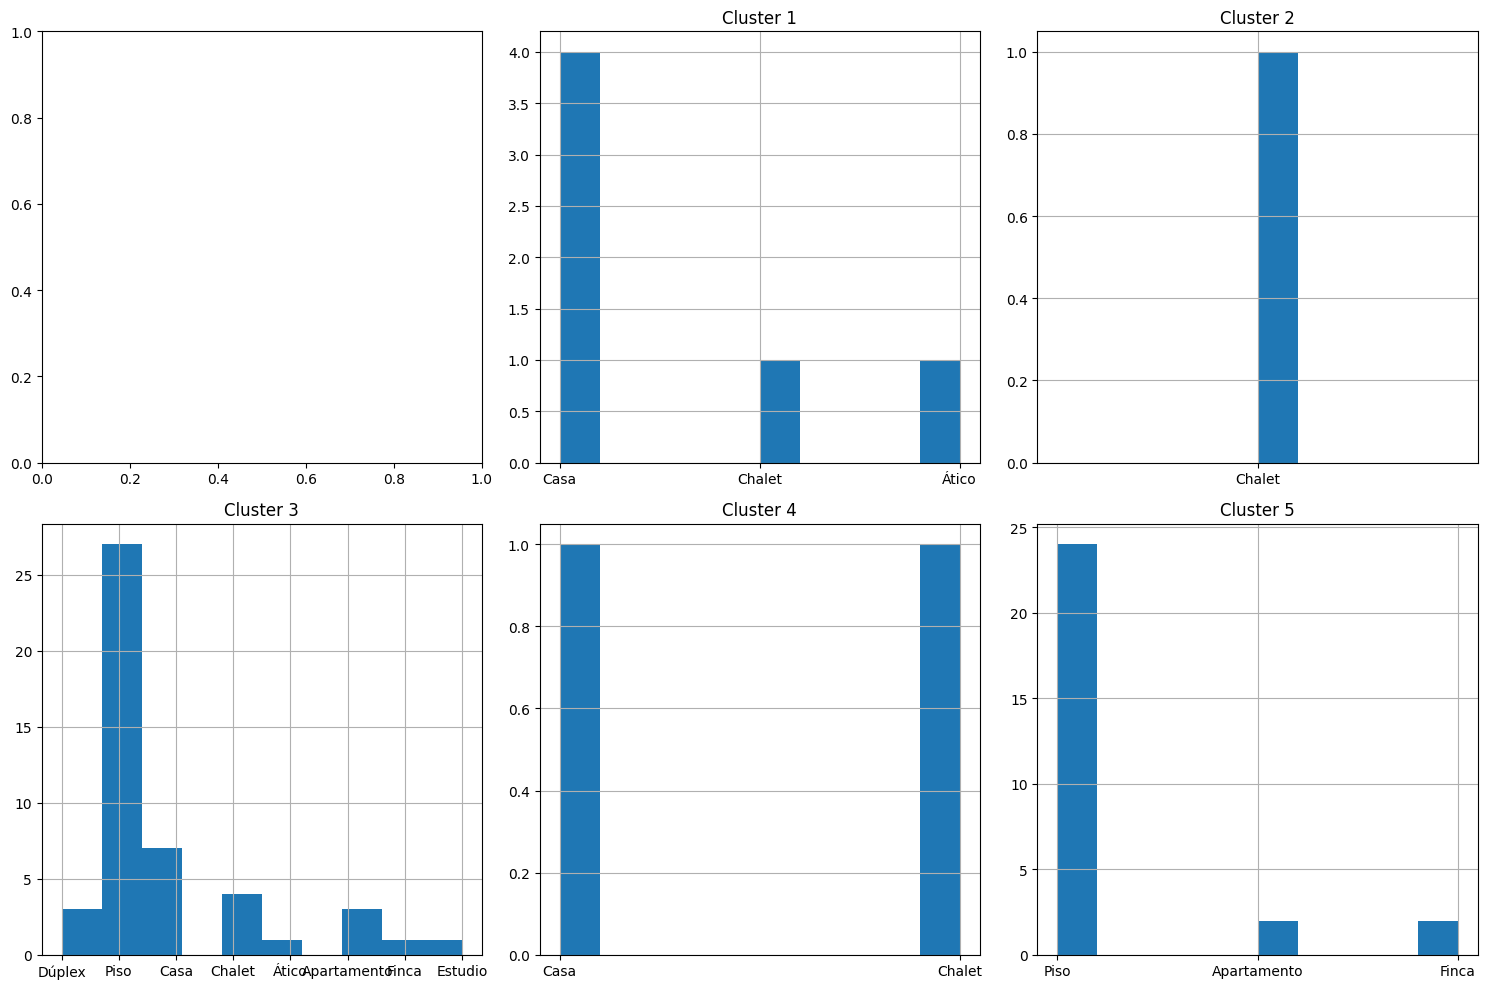

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(1,6):
    df.loc[df['clusters'] == i]['summary'].hist(ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
    
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   summary             100 non-null    object 
 1   city                100 non-null    object 
 2   neighborhood        65 non-null     object 
 3   region              100 non-null    object 
 4   price               100 non-null    float64
 5   square_meters       100 non-null    float64
 6   bedrooms            100 non-null    float64
 7   bathrooms           100 non-null    float64
 8   images              100 non-null    object 
 9   num_images          100 non-null    float64
 10  property_type       100 non-null    object 
 11  property_quality    66 non-null     float64
 12  kitchen_quality     40 non-null     float64
 13  bathroom_quality    41 non-null     float64
 14  interior_quality    62 non-null     float64
 15  style_label         12 non-null     object 
 16  style_con

In [23]:
import numpy as np
from scipy.spatial.distance import cdist

def recomenada(imatge,df,df_concatenado,likes,kmeans):
    if likes == []:
        # Seleccionar el punto de interés
        punto_interes = list(df_concatenado.loc[imatge])      
        # Ajuste del modelo con el nuevo dato
        kmeans.partial_fit([punto_interes])

        # Predicción del nuevo dato actualizado
        cluster = kmeans.predict([punto_interes])[0]
        
        # Seleccionar los puntos del mismo cluster que el punto de interés
        puntos_cluster=df_concatenado.loc[df[df['clusters'] == cluster].index]
        distancias = cdist([punto_interes], puntos_cluster)

        # Obtener los índices de los dos puntos más cercanos
        indices_cercanos = np.argsort(distancias, axis=1)# si volem afegir a la primera [:,i][0],on i va augmentant 1 per cada like

        # Seleccionar los puntos más cercanos
        puntos_cercanos = puntos_cluster.iloc[indices_cercanos[0]]
        df.loc[list(puntos_cercanos.index)]
        return list(puntos_cercanos.index)[1] #ho haurem d'aplicar com la línia anterior
    
    else:
        last=likes[-1]
        punto_interes=df_concatenado.iloc[last]
        #cluster = df.iloc[imatge]['clusters']
        kmeans.partial_fit([list(df_concatenado.loc[imatge])])
        cluster = kmeans.predict([list(df_concatenado.loc[imatge])])[0]
        puntos_cluster=df_concatenado.loc[df[df['clusters'] == cluster].index]
        distancias = cdist([punto_interes], puntos_cluster)
        indices_cercanos = np.argsort(distancias, axis=1)# si volem afegir a la primera [:,i][0],on i va augmentant 1 per cada like
        puntos_cercanos = puntos_cluster.iloc[indices_cercanos[0]]
        df.loc[list(puntos_cercanos.index)]
        return list(puntos_cercanos.index)[1] #ho haurem d'aplicar com la línia anterior

In [24]:
print(recomenada(40230,new_df,df_concatenado,[1,3],kmeans))

4721


In [ ]:
import random
def tinder(imatge,likes,accio,df,df_concatenado):
   if accio == 'Like':#??
      seguent=recomenada(imatge,df,df_concatenado,likes)#passar seguent al html
      likes.append(imatge)
      df.drop(imatge,axis=0)
   else:
      seguent=recomenada(random.randint(0,len(df)-len(likes)),df,df_concatenado,likes)
      df.drop(imatge,axis=0)     
   return seguent,df,likes#tinder(seguent,likes,clic(seguent),df,df_concatenado)

def clic(imatge):
   return 

#tinder(imatge,[],clic(imatge))


In [ ]:
cases=True
imatge=..#li passem de la web
passem(df.iloc[imatge]['images'])
likes=[]
while cases:
    imatge,df,likes=tinder(imatge,likes,clic(imatge),df,df_concatenado)
    passem(df.iloc[imatge]['images']) #la seguent
    if len(df)==0:
        cases=False


IndentationError: expected an indented block (2263578737.py, line 2)